### Fenics Demo

In [1]:
from dolfin import *
import matplotlib.pyplot as plt

Define our mesh and our boundary

In [2]:
n = 50
mesh = UnitIntervalMesh(n)
def my_boundary(x): #0 or 1
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

Define the function space. The arguments refer to the type of finite element function. "CG" and 1 mean piecewise linear polynomials

In [3]:
V = FunctionSpace(mesh, "CG", 1)

In [4]:
#Here we define the boundary condition based on the boundary and the value at the boundary
u0 = Constant(0)
bc = DirichletBC(V, u0, my_boundary)

Part of the finite element method entails manipulating some function u to match the conditions we specify (the differential equation and the boundary condition). 
Wrtiting in variational form entails using some test funtion v, which we also define here.

In [5]:
u = TrialFunction(V)
v = TestFunction(V)

We define f here as well as the constant a(x) (which we name c here). 
Then we write the variational form and have FEniCS solve it

In [6]:
f = Expression("sin(pi*x[0])", degree=1)
c = Expression("1", degree=1)
a = (c*inner(grad(u), grad(v)))*dx
L = f*v*dx
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


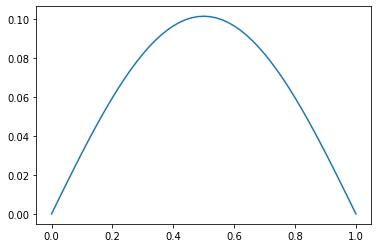

In [7]:
#We can plot the function u
plot(u)
plt.show()

In [8]:
#Or get u at a specific value
u(0.5)

0.1012878568897707

### Solving the Toy Problem

In [9]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

In [10]:
set_log_active(False)

Here we define a function that has Fenics solve our equation given the functionspace, boundary conditions, f(x), the value to compute at, and what the constant a(x) is (we use c for this value)

We want to plug in random values of c when we approximate the expected value when a(x) is a random variable

In [11]:
def u_at(boundary, V, u0, f, val_at, c):
    bc = DirichletBC(V, u0, boundary)
    u = TrialFunction(V)
    v = TestFunction(V)
    a = (c*inner(grad(u), grad(v)))*dx
    L = f*v*dx
    u = Function(V)
    solve(a == L, u, bc)
    return(u(val_at))

In [12]:
def my_boundary(x): #0 or 1
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

In [13]:
n = 50
mesh = UnitIntervalMesh(n)
V = FunctionSpace(mesh, "CG", 1)
u0 = Constant(0)
f = Expression("sin(pi*x[0])", degree=1)
c2 = Expression("x[0]", degree=1)
c3 = Expression("1", degree=1)
bc = DirichletBC(V, u0, my_boundary)
v = TestFunction(V)
L = f*v*dx

In [14]:
%%time
u_at(my_boundary, V, u0, f, 0.6, 1.4)

CPU times: user 16.8 ms, sys: 2.25 ms, total: 19.1 ms
Wall time: 3.82 ms


0.06880748308327743

In [15]:
import qmcpy as qp

In [16]:
n = 10
mesh = UnitIntervalMesh(n)
V = FunctionSpace(mesh, "CG", 1)
u0 = Constant(0)
f = Expression("sin(pi*x[0])", degree=1)
def my_boundary(x): #0 or 1
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

In [17]:
%%time
iid = qp.Uniform(qp.IIDStdUniform(dimension=1, seed=None), lower_bound=1, upper_bound=2)
iid_samples = iid.gen_samples(10) #Get samples of uniformly distributed random values
u_samples = [0] * len(iid_samples) #Initialize an array to store values of u(0.5)
for i, x in enumerate(iid_samples):
    c = Expression(str(x[0]), degree=1) #Generate the expression for what we want to do
    u_samples[i] = u_at(my_boundary, V, u0, f, 0.5, c)

CPU times: user 75.6 ms, sys: 105 ms, total: 181 ms
Wall time: 19.4 s


In [18]:
u

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', interval, 1), dim=1), 0), FiniteElement('Lagrange', interval, 1)), 9)

When we average all of our results, we get a value fairly close to the true value 

In [19]:
estimated_value = sum(u_samples)/len(u_samples)
estimated_value 

0.0718769754773697

In [20]:
true_value = (np.log(2))/(np.pi**2)
error = abs(estimated_value - true_value)/true_value
error

0.023443986218579342